In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
#2. Load the dataset and Display First and Last 3 rows of the dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/indian_food.csv")
print(df.head(3))
print(df.tail(3))

             name                                   ingredients        diet  \
0      Balu shahi               Maida flour, yogurt, oil, sugar  vegetarian   
1          Boondi                       Gram flour, ghee, sugar  vegetarian   
2  Gajar ka halwa  Carrots, milk, sugar, ghee, cashews, raisins  vegetarian   

   prep_time  cook_time flavor_profile   course        state region  
0         45         25          sweet  dessert  West Bengal   East  
1         80         30          sweet  dessert    Rajasthan   West  
2         15         60          sweet  dessert       Punjab  North  
          name                                        ingredients        diet  \
252     Shufta  Cottage cheese, dry dates, dried rose petals, ...  vegetarian   
253  Mawa Bati  Milk powder, dry fruits, arrowroot powder, all...  vegetarian   
254     Pinaca  Brown rice, fennel seeds, grated coconut, blac...  vegetarian   

     prep_time  cook_time flavor_profile   course            state   region  


In [ ]:
#3. Check the data types of each column
df.dtypes

,0
name,object
ingredients,object
diet,object
prep_time,int64
cook_time,int64
flavor_profile,object
course,object
state,object
region,object


In [ ]:
#5. Find the descriptive Statistics of the entire dataset
print(df.describe())
pd.isna(df).any()

        prep_time   cook_time
count  255.000000  255.000000
mean    31.105882   34.529412
std     72.554409   48.265650
min     -1.000000   -1.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


,0
name,False
ingredients,False
diet,True
prep_time,False
cook_time,False
flavor_profile,False
course,True
state,False
region,True


In [ ]:
#Setting the missing value to mean of price and convert the datatype to integer
price = df['prep_time'].loc[df['prep_time'] != '?']
print(price)
pmean = price.astype(int).mean()
print("Mean =",pmean)
df['prep_time'] = df['prep_time'].replace('?',pmean).astype(int)
df['prep_time'].head(10)

0      45
1      80
2      15
3      15
4      15
       ..
250     5
251    20
252    -1
253    20
254    -1
Name: prep_time, Length: 255, dtype: int64
Mean = 31.105882352941176


,prep_time
0,45
1,80
2,15
3,15
4,15
5,10
6,10
7,10
8,20
9,10


In [ ]:
# Cleaning the horsepower losses field
horsepower = df['cook_time'].loc[df['cook_time'] != '?']
hpmean = horsepower.astype(int).mean()
df['cook_time'] = df['cook_time'].replace('?',hpmean).astype(int)
df['cook_time'].head()

,cook_time
0,25
1,30
2,60
3,30
4,40


In [ ]:
#6. compute the measure of central tendency of the height column.
#Descriptive Statistics
#Calculate mean, median and mode of dat set height
mean = df["cook_time"].mean()
median =df["cook_time"].median()
mode = df["cook_time"].mode()
print(mean , median, mode)

34.529411764705884 30.0 0    30
Name: cook_time, dtype: int64


Text(0.5, 0, 'Make of the state')

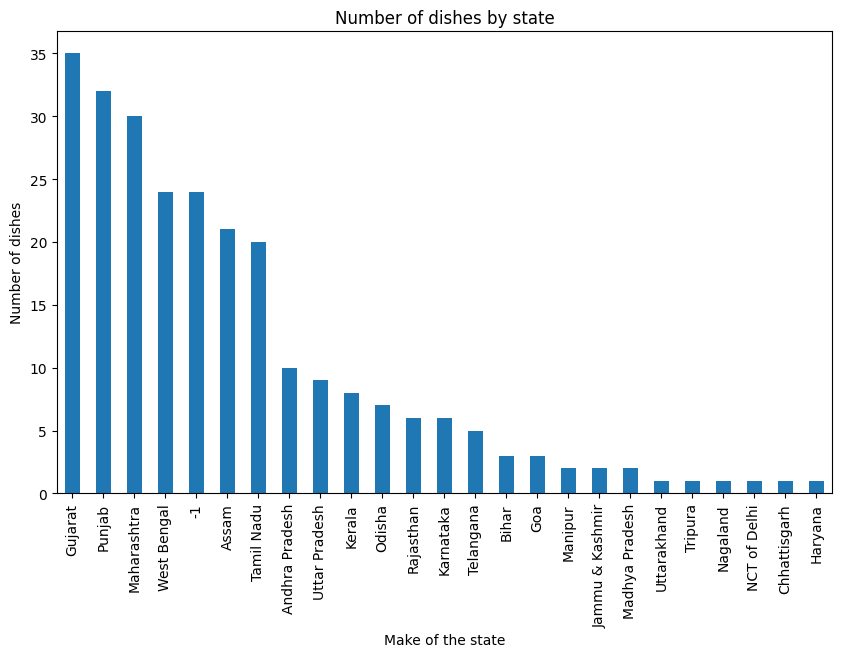

In [ ]:
#7. First 30 largest values and draw a bar chart
df.state.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.title("Number of dishes by state")
plt.ylabel('Number of dishes')
plt.xlabel('Make of the state')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


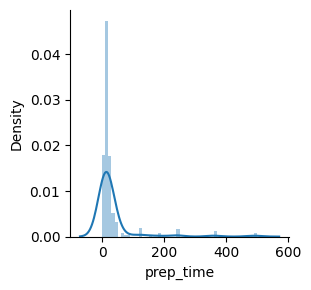

In [ ]:
#8. Distribution plot
sns.FacetGrid(df).map(sns.distplot,"prep_time").add_legend()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


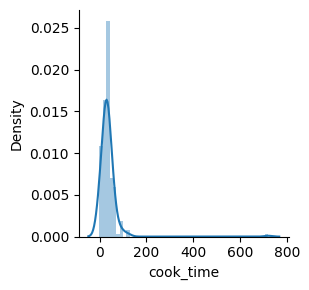

In [ ]:
#distribution plot
sns.FacetGrid(df).map(sns.distplot,"cook_time").add_legend()

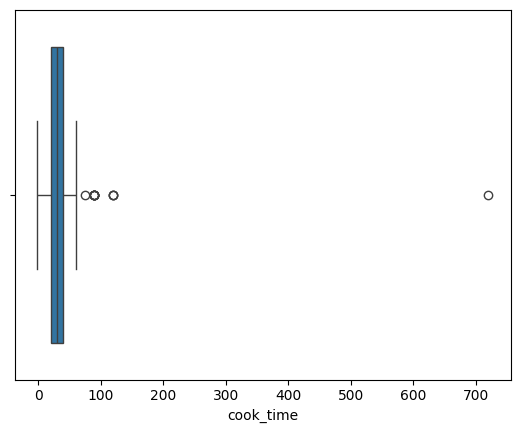

In [ ]:
#boxplot for price of cars
sns.boxplot(x="cook_time",data=df)
plt.show()

Text(0, 0.5, 'prep_time')

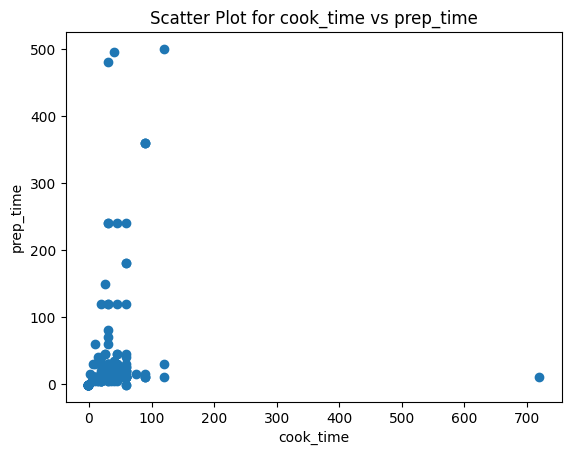

In [ ]:
plt.scatter(df["cook_time"], df["prep_time"])
plt.title("Scatter Plot for cook_time vs prep_time")
plt.xlabel("cook_time")
plt.ylabel("prep_time")

In [ ]:
#Relationshipt between two features (Positive Correlation)
np.corrcoef(df["cook_time"], df["prep_time"])

array([[1.        , 0.14411325],
       [0.14411325, 1.        ]])

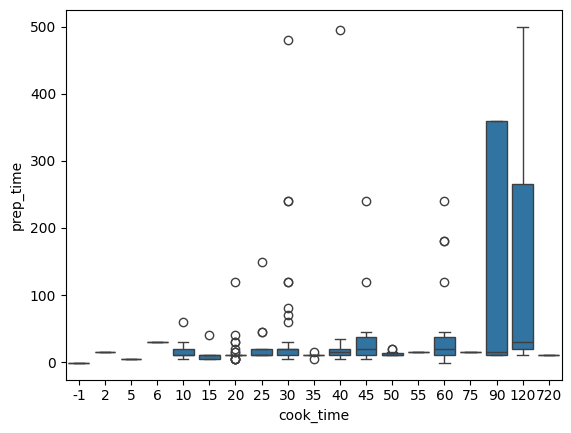

In [ ]:
sns.boxplot(x="cook_time",y="prep_time",data=df)
plt.show()

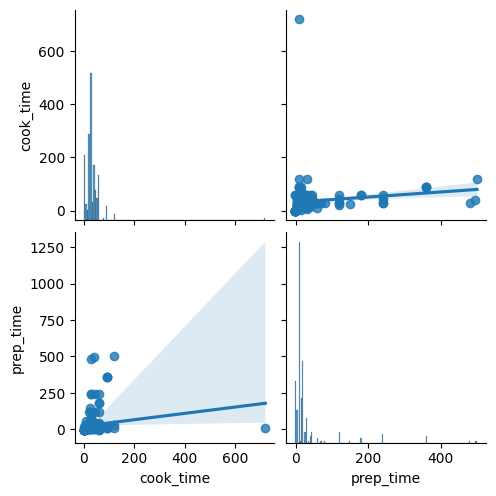

In [ ]:
#1. 1. We can use the scatter_matrix() function from the pandas.tools.plotting package or
# the seaborn.pairplot() function from the seaborn package to do this:
# pair plot with plot type regression

# pair plot with plot type regression
sns.pairplot(df,vars = [ 'cook_time','prep_time'], kind="reg")
plt.show()


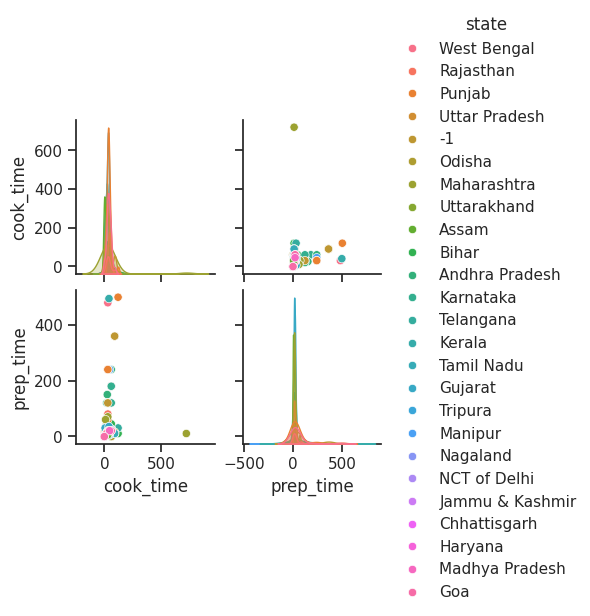

In [ ]:
#2. A pair plot by specifying the colors, labels, plot type, diagonal plot type, and variables.
#pair plot (matrix scatterplot) of few columns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['cook_time','prep_time'], hue="state")
plt.show()

In [ ]:
#3. To calculate the correlation coefficient for the price and horsepower,
from scipy import stats

corr = stats.pearsonr(df["cook_time"], df["prep_time"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.02133363269962658
cor:		 0.14411325100222427


In [ ]:
# To find the correlation among the entire numerical records
# the columns using pearson method
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,prep_time,cook_time
prep_time,1.000000,0.144113
cook_time,0.144113,1.000000


<Axes: >

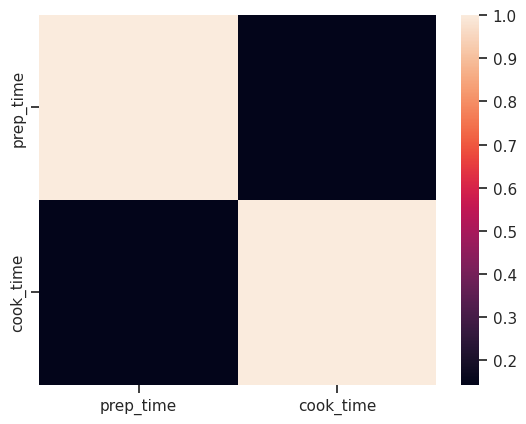

In [ ]:
#5. Visualize this correlation analysis using a heatmap.
#A heatmap is the best technique to make this look beautiful and easier to interpret:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)